# Lab 1 Report

Paul Chung

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
# example: importing numpy
import numpy as np

# import whatever other modules you use in this lab
import simpleaudio as sa
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav


## Summary

In this lab, we are introduced to Python and the basics of signals. We demonstrate our understanding through a series of exercises. 

## Assignment 1 -- Creating and Manipulating Arrays (Title of Assignment 1)

In [89]:
# Assignment 1 - Creating and Manipulating Arrays (Title of Assignment 1)

# Here you'd put in your code for Assignment 1, organized by parts if necessary
# For example:

# Part A
array_example = np.array([1, 2, 3]) # Defining an example array
print('array_example = ', array_example) # Print out array_example

y1 = np.array([4, 6, 2])

# Part B
ca = y1[1]
cb = y1[1:3]
d = len(y1)
print('ca =', ca)
print('cb =', cb)
print('d =', d)

# Part C
x1 = np.ones(5)
x1 = x1 + 1
x2 = np.arange(-2,3,1)
print('x1=', x1)
print('x2=', x2)

# Part D
arrp = x1 + x2
arrc = np.concatenate([x1, x2])
print("arrp =", arrp)
print("arrc =", arrc)

array_example =  [1 2 3]
ca = 6
cb = [6 2]
d = 3
x1= [2. 2. 2. 2. 2.]
x2= [-2 -1  0  1  2]
arrp = [0. 1. 2. 3. 4.]
arrc = [ 2.  2.  2.  2.  2. -2. -1.  0.  1.  2.]


###  Discussion

Addition of two vectors adds each element of one vector in respect to another vector's elements (point sum). Concatenation leaves all elements in vectors as is and adds one vector to end of another vector. 


## Assignment 2 -- Amplitude Operations on Signals (title of assignment 2)

In [90]:
# Assignment 2 - Title of Assignment 2

# Here you'd put in your code for Assignment 2

# Part A
fs=2 # example of defining the sampling frequency
print('fs = ', fs) # Print out fs

t = np.arange(0, 3 + 1/fs, 1/fs)
x = 0.5 * t
y = t ** 2
print('x =', x)
print('y =', y)

# Part B
z = x - 2 * y
print('z =', z)

# Part C
nstart = int(0*fs)
n1 = int(2*fs)
w1 = z[n1 - nstart]
print("w1 =", w1)

# Part D
n2 = int(1.5 * fs)
w2 = z[0: n2 - nstart + 1]
print("w2 =", w2)

fs =  2
x = [0.   0.25 0.5  0.75 1.   1.25 1.5 ]
y = [0.   0.25 1.   2.25 4.   6.25 9.  ]
z = [  0.    -0.25  -1.5   -3.75  -7.   -11.25 -16.5 ]
w1 = -7.0
w2 = [ 0.   -0.25 -1.5  -3.75]


###  Discussion

If we change fs=1, there would be less steps in our t vector. The period would be 1 (instead of 1/2 if fs=2) and would half the length of all the vectors. 

## Assignment 3 -- Working with Sound Files

In [95]:
# Assignment 3

# Part A
wav_obj = sa.WaveObject.from_wave_file('train32.wav')
ch1 = wav_obj.num_channels
fs1, y1 = wav.read('train32.wav')
print('Train whistle has: sampling rate', fs1, ', # of samples', len(y1), ', type', y1.dtype, ', # of channels', ch1)
fs2, y2 = wav.read('tuba11.wav')
len2, ch2 = y2.shape
print('Tuba has: sampling rate', fs2, ', # of samples', len(y2), ', type', y2.dtype, ', # of channels', ch2)

# Part B
play_objX = sa.play_buffer(data1, ch1, 2, fs1)
play_objX.wait_done()
play_objY = sa.play_buffer(data2, ch2, 2, fs2)
play_objY.wait_done()

play_obj1 = sa.play_buffer(data1, ch1, 2, fs2)
play_obj1.wait_done()
play_obj2 = sa.play_buffer(data2, ch2, 2, fs1)
play_obj2.wait_done()


# Part C
minLength = min(len(y1), len(y2))
y2_ch0 = y2[:,0]
y3 = y2_ch0[0:minLength]
y4 = y3 + y1
play_obj3 = sa.play_buffer(y4, ch1, 2, fs1)
outfile1 = 'partC'
wav.write(outfile1, fs1, y4.astype('int16'))
play_obj3.wait_done()

# Part D
pause = np.zeros(int(4*fs1))
y5 = np.concatenate([y1, pause, y2_ch0])
outfile2 = 'partD'
wav.write(outfile2, fs1, y5.astype('int16'))
play_obj4 = sa.WaveObject.from_wave_file('partD').play()
play_obj4.wait_done()

Train whistle has: sampling rate 32000 , # of samples 50313 , type int16 , # of channels 1
Tuba has: sampling rate 11025 , # of samples 109708 , type int16 , # of channels 2


### Discussion

In Part B, the train sound was played much slower and was a deeper pitch, and the tuba sound was played much faster and was a higher pitch than originally. In part C, the sound was overlapping because we did a point sum of each sample from the train file and part of the tuba file. Since tuba is stereo (multiple channels), we had to extract one channel since the train only has one channel. In order to concatenate and do point sum operations, we had to make sure the arrays were the same dimension.


## Assignment 4 -- Plotting Comparisons

<IPython.core.display.Javascript object>


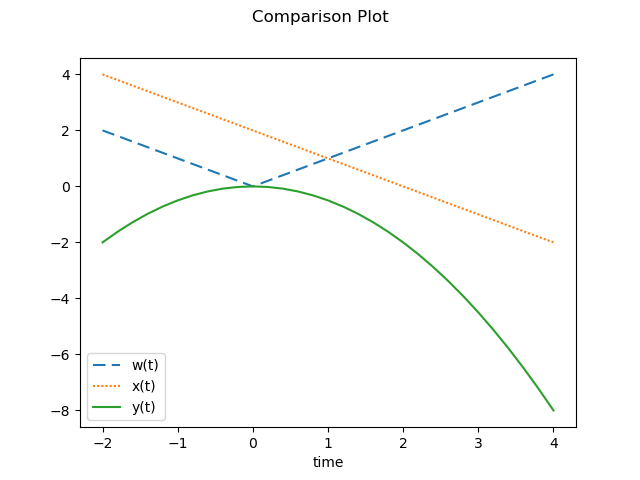

In [3]:
# Assignment 4

# Part A
fs = 5
t = np.arange(-2, 4 + 1/fs, 1/fs)
w = abs(t)
x = 2 - t
y = -.5 * t **2

# Part B
fig1 = plt.figure(1)

plt.plot(t, w, label='w(t)', dashes = [6,3])
plt.plot(t, x, label='x(t)', dashes = [1, 1])
plt.plot(t, y, label='y(t)')
plt.xlabel("time")
plt.suptitle("Comparison Plot")
plt.legend()
plt.show()

### Discussion

We can use matplotlib’s line styles property to help distinguish lines in our legend instead of using colors.

## Assignment 5 -- Plotting Sound Files using Subplots


<IPython.core.display.Javascript object>


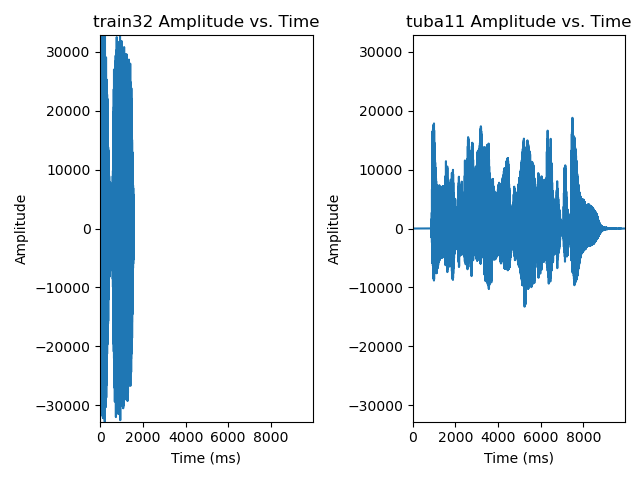

In [85]:
# Assignment 5 -- Plotting Sound Files using Subplots

# Part A
wav_obj = sa.WaveObject.from_wave_file('train32.wav')
ch1 = wav_obj.num_channels
fs1, y1 = wav.read('train32.wav')
fs2, y2 = wav.read('tuba11.wav')
len2, ch2 = y2.shape
t1 = np.arange(0, len(y1)/fs1, 1/fs1) * 1000
t2 = np.arange(0, len(y2)/fs2, 1/fs2) * 1000

# Part B

plt.subplot(1, 2, 1)
plt.xlim(0, max(len(y1)/fs1, len(y2)/fs2) * 1000)
max1 = np.max(np.abs(y1)) 
max2 = np.max(np.abs(y2))
overallMax = max(max1, max2)
plt.ylim(-overallMax, overallMax)
plt.title('train32 Amplitude vs. Time')
plt.plot(t1, y1)
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')


y2_ch0 = y2[:,0]
plt.subplot(1, 2, 2)
plt.plot(t2, y2_ch0)
plt.xlim(0, max(len(y1)/fs1, len(y2)/fs2) * 1000)
plt.ylim(-overallMax, overallMax)
plt.title('tuba11 Amplitude vs. Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

plt.tight_layout()

### Discussion

Train32 has a much higher sampling rate than tuba11 because we can see in the above graphs that train32 finishes much faster than tuba11. Train32's graph is more compressed, indicating higher frequency. 